# 1. One-way ANOVA

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1. Data
a = [164, 172, 177, 156, 195]
b = [178, 191, 182, 185, 177]
c = [175, 193, 171, 163, 176]
d = [155, 166, 164, 170, 168]

In [3]:
# 2. Create dataframe
df = pd.DataFrame({
    'A': a, 'B': b, 'C': c, 'D': d
})

In [4]:
df

,A,B,C,D
0,164,178,175,155
1,172,191,193,166
2,177,182,171,164
3,156,185,163,170
4,195,177,176,168


### Hypothesis
- $H_0$: 각 웹 페이지는 동일한 체류시간을 갖는다. $\mu_A=\mu_B=\mu_C\mu_D$
- $H_1$: 다른 체류시간을 갖는 웹 페이지가 1개 이상 존재한다.

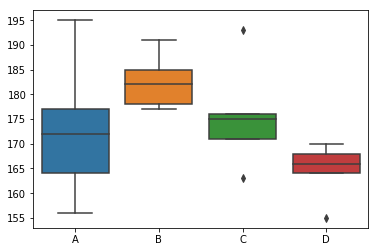

In [5]:
# 3. Plotting the data
sns.boxplot(data=df)

This boxplot shows the mean values of each group are different.

> Scipy

In [6]:
f_statistic, pval = stats.f_oneway(
    df['A'], df['B'], df['C'], df['D'])

In [7]:
print('F-statistic:', f_statistic)
print('P-value:', pval)

F-statistic: 2.739825341901467
P-value: 0.0775862152580146


> Statsmodels

In [8]:
df = pd.DataFrame({
    'value': a + b + c + d,
    'treatment': ['A'] * 5 + ['B'] * 5 + ['C'] * 5 + ['D'] * 5
})

In [9]:
df.head()

,treatment,value
0,A,164
1,A,172
2,A,177
3,A,156
4,A,195


In [10]:
model = ols('value ~ treatment', df).fit()

In [11]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
treatment,3.0,831.4,277.133333,2.739825,0.077586
Residual,16.0,1618.4,101.150000,NaN,NaN


## Results
- $\text{p-value} <= \alpha$ : The differences between the means are statistically significant. We reject the null hypothesis and conclude that not all of population means are equal.
- $\text{p-value} > \alpha$ : The differences between the means are not statistically significant. We do not have enough evidence to reject the null hypothesis that the population means are all equal.

P-value가 0.077 < 0.05(유의수준 $\alpha$) 이므로, 귀무가설을 기각할 증거가 부족하다. 따라서 각 **웹 페이지의 체류시간이 다르다고 볼 수 있는 근거가 없다**. 